This is an example of how NLP works~! Can it clean numbers? 1 2 3 %^&* :)

In [2]:
# import
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud
import re



In [3]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Domenick
[nltk_data]     Dobbs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Domenick Dobbs\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Domenick
[nltk_data]     Dobbs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv("movie_data.csv")
df.count()

review       50000
sentiment    50000
dtype: int64

In [5]:
X = df["review"].values
y = df["sentiment"].values

count = CountVectorizer()

In [6]:
bag_of_words = count.fit_transform(X)

# Get vocabulary (unique words)
feature_names = count.get_feature_names_out()

# Sum the counts for each word across all documents
word_counts = bag_of_words.sum(axis=0).A1

# Create a dictionary mapping words to their counts
word_count_dict = dict(zip(feature_names, word_counts))

print(word_count_dict)

{'00': 208, '000': 619, '00000000000': 2, '0000000000001': 1, '00000001': 1, '00001': 2, '00015': 1, '000dm': 1, '000s': 1, '001': 5, '003830': 1, '006': 1, '0069': 1, '007': 76, '0079': 2, '007s': 1, '0080': 4, '0083': 3, '009': 1, '0093638': 1, '00am': 7, '00o': 1, '00pm': 6, '00s': 7, '00schneider': 1, '01': 42, '0126': 1, '0148': 1, '01pm': 1, '02': 32, '020410': 1, '0230': 1, '029': 1, '03': 14, '039': 1, '04': 14, '041': 1, '044': 1, '05': 20, '050': 1, '05nomactr': 1, '06': 33, '0615': 1, '06th': 1, '07': 18, '07b': 1, '08': 23, '087': 1, '089': 1, '08th': 3, '09': 14, '0and': 1, '0f': 3, '0ne': 1, '0r': 1, '0s': 1, '0tt': 1, '10': 8614, '100': 928, '1000': 97, '10000': 3, '1000000': 2, '10000000000': 1, '10000000000000': 3, '10000th': 1, '1000lb': 1, '1000s': 3, '1000th': 1, '1001': 3, '1004': 1, '100b': 1, '100bt': 1, '100ft': 2, '100ibs': 1, '100k': 3, '100m': 1, '100miles': 1, '100min': 2, '100mins': 1, '100mph': 1, '100s': 5, '100th': 15, '100times': 1, '100x': 4, '100yards

In [7]:
# Define preprocessing functions
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # POS tagging
    pos_tags = nltk.pos_tag(tokens)
    
    # Lemmatization and Stemming
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    processed_tokens = []
    for word, tag in pos_tags:
        lemmatized_word = lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        stemmed_word = stemmer.stem(lemmatized_word)
        processed_tokens.append(stemmed_word)
    
    return ' '.join(processed_tokens)

In [8]:
# Apply preprocessing to the dataset
df['processed_review'] = df['review'].apply(preprocess_text)
df['processed_wordCloud'] = df['review'].apply(word_tokenize)

In [9]:
# Split the data into training and test sets
X = df['processed_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy}')

Test accuracy: 0.8932


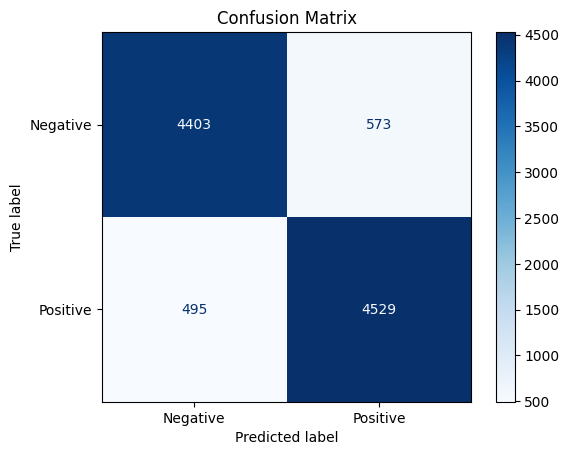

In [14]:
# Visualize model performance with a confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues) #colors here
plt.title("Confusion Matrix")
plt.show()

In [15]:
# Function to predict sentiment of a given text
def predict_sentiment(text, vectorizer, model):
    processed_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([processed_text])
    pred = model.predict(vectorized_text)
    return 'Positive' if pred[0] == 1 else 'Negative'

In [16]:
# Example sentences
examples = [
    "This movie was fantastic! I really enjoyed it.",
    "I hated this movie. It was terrible.",
    "It was an average movie, not too good, not too bad.", #this would have been a neutral sentimnet
    "The plot was boring and the acting was bad.",
    "Absolutely loved the cinematography and story."
]

In [17]:
# Display predictions
for sentence in examples:
    sentiment = predict_sentiment(sentence, vectorizer, model)
    print(f"Review: {sentence}\nPredicted Sentiment: {sentiment}\n")

Review: This movie was fantastic! I really enjoyed it.
Predicted Sentiment: Positive

Review: I hated this movie. It was terrible.
Predicted Sentiment: Negative

Review: It was an average movie, not too good, not too bad.
Predicted Sentiment: Negative

Review: The plot was boring and the acting was bad.
Predicted Sentiment: Negative

Review: Absolutely loved the cinematography and story.
Predicted Sentiment: Positive



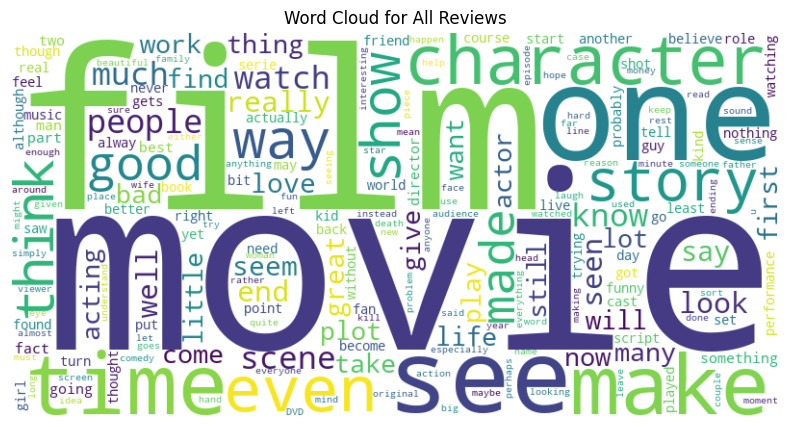

In [18]:
# Create a word cloud
# all_text = ' '.join(df['review'])
# # all_text_for_sentiment = ' '.join(df['processed_review'])
# positive_text = ' '.join(df[df['sentiment'] == 1]['review'])
# negative_text = ' '.join(df[df['sentiment'] == 0]['review'])

all_text = re.sub(r'<br\s*/?>', '', ' '.join(df['review']))
positive_text = re.sub(r'<br\s*/?>', '', ' '.join(df[df['sentiment'] == 1]['review']))
negative_text = re.sub(r'<br\s*/?>', '', ' '.join(df[df['sentiment'] == 0]['review']))

wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Word Cloud for All Reviews')
plt.axis('off')
plt.show()

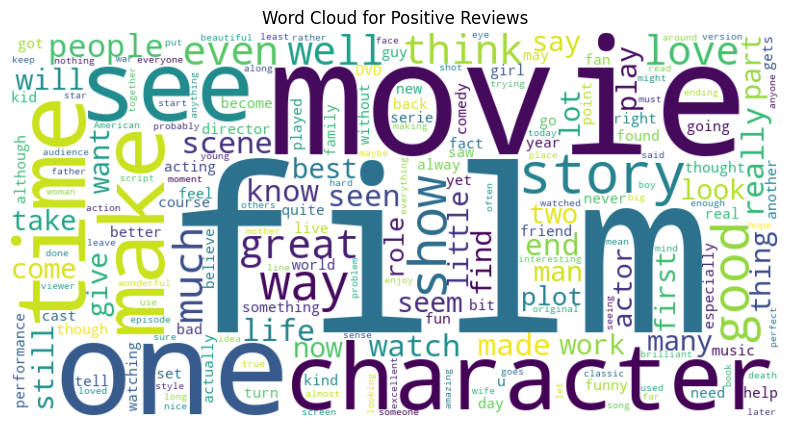

In [19]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

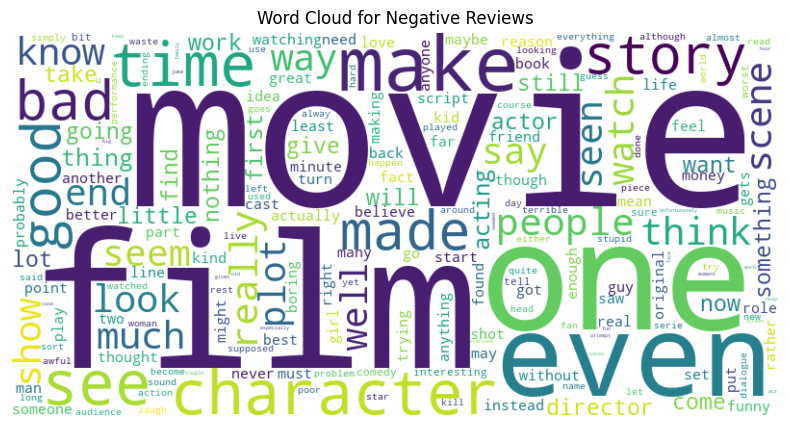

In [20]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [21]:
df["review"][50]
# df["review"][607]
# df["review"][101]

"How this character ever got hired by the post office is far beyond me. The test that postal workers take is so difficult. There is no way that a guy this stupid can work at the post office. Everyone in this movie is just stupid and that is probably the point of the movie. How they could go their entire lives and not see an elevator is also puzzling. I didn't take this movie too seriously but it was so stupid. Then he tries to start the car without his keys? Lots of horrible scenes and horrible acting and this movie is not funny at all. It's just a sad stupid mess. I liked the moms dress though.<br /><br />Send it back to sender as soon as possible."

In [22]:
df["review"][607][:300]

'When this cartoon first aired I was under the impression that it would be at least half way descent, boy was I wrong. I must admit watching this cartoon is almost as painful as watching Batman and Robin with George Clooney all those years ago. I watched a few episodes and two of them had Batman lite'

"When this cartoon first aired I was under the impression that it would be at least half way descent, boy was I wrong. I must admit watching this cartoon is almost as painful as watching Batman and Robin with George Clooney all those years ago. I watched a few episodes and two of them had Batman literally get his ass kicked left and right by the Penguin who fought like Jet Li and beat the crap out of Batman and I watched another episode where Batman got his butt kicked again by the Joker, who apparently was using Jackie Chan moves while flipping in the air like a ninja. Since when were the Joker or the Penguin ever a match for Batman ? and worse yet when were Joker and Penguin Kung Fu counterparts of Jackie Chan and Jet Li. It's truly embarrassing, depressing and sad the way the image of Batman is portrayed in this show. The animation is awful and the dialog is terrible. Being a Batman fan since my boyhood I can honestly and strongly advise you to stay away and avoid this show at all cost, because it doesn't project the true image of Batman. This cartoon is more like a wannabe Kung Fu Flick and if you really wanna see a classic Batman cartoon I strongly recommend Batman the Animated Series, but this cartoon is nothing more than a piece of S---T! Get Batman: The Animates Series and don't waste your time with this cartoon."

In [23]:
examples2 = [
    df["review"][50],
    df["review"][607],
    df["review"][101]
    ]

for sentence in examples2:
    sentiment = predict_sentiment(sentence, vectorizer, model)
    print(f"Review: {sentence}\nPredicted Sentiment: {sentiment}\n")

Review: How this character ever got hired by the post office is far beyond me. The test that postal workers take is so difficult. There is no way that a guy this stupid can work at the post office. Everyone in this movie is just stupid and that is probably the point of the movie. How they could go their entire lives and not see an elevator is also puzzling. I didn't take this movie too seriously but it was so stupid. Then he tries to start the car without his keys? Lots of horrible scenes and horrible acting and this movie is not funny at all. It's just a sad stupid mess. I liked the moms dress though.<br /><br />Send it back to sender as soon as possible.
Predicted Sentiment: Negative

Review: When this cartoon first aired I was under the impression that it would be at least half way descent, boy was I wrong. I must admit watching this cartoon is almost as painful as watching Batman and Robin with George Clooney all those years ago. I watched a few episodes and two of them had Batman 

In [24]:
# df["sentiment"][50]
# df["sentiment"][607]
df["sentiment"][101]

1

In [25]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open("vectorizer.pkl", 'wb') as file:
    pickle.dump(vectorizer, file)